In [ ]:
#CNN ON LUNG CANCER
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#the beginning

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: flourisholaiya
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset


100%|██████████| 199M/199M [00:06<00:00, 34.1MB/s]


In [ ]:
#to count no of images in the classes

ROOT_DIR = "/content/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset" #/content/ct-scan-images-for-lung-cancer"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

In [ ]:
number_of_images.items()

os.listdir("/content/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset")

['.ipynb_checkpoints', 'Bengin cases', 'Normal cases', 'Malignant cases']

In [ ]:

#to create a train folder
def datafolder(p, split):

    if not os.path.exists("./" +p):
        os.mkdir("./" +p)

        for dir in os.listdir(ROOT_DIR):
            os.makedirs(os.path.join("./"+ p, dir), exist_ok=True)
            num_images_to_move = math.floor(split * number_of_images[dir])
            image_filenames = os.listdir(os.path.join(ROOT_DIR, dir))
            disk = min(num_images_to_move, len(image_filenames))


            selected_images = np.random.choice(image_filenames, size = num_images_to_move, replace = False)
            for img in selected_images:
                O = os.path.join(ROOT_DIR, dir, img)
                D = os.path.join("./" +p,  dir, img)
                shutil.copy(O, D)
                #os.remove(O)

    else:
        print(f"{p}folder exists")

In [ ]:
#to create a train folder
#def datafolder(p, split):

    if not os.path.exists("./" +p):
        os.mkdir("./" +p)

        for dir in os.listdir(ROOT_DIR):
            os.makedirs("./"+ p + dir)

            for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)), size = (math.floor(split * number_of_images[dir]), 2), replace = False):

                O = os.path.join(ROOT_DIR, dir, img)
                D = os.path.join("./" +p,  dir)
                shutil.copy(O, D)
                os.remove(O)

    else:
        print(f"{p}folder exists")

IndentationError: unexpected indent (<ipython-input-9-1bab638c3c3b>, line 4)

In [ ]:
datafolder("Train", 0.70)

In [ ]:
datafolder("Test", 0.20)

In [ ]:
datafolder("Val", 0.10)

In [ ]:
#model building

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D

from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator #load_img, img_to_arra


import keras
import tensorflow

In [ ]:
#CNN Model

#model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", input_shape = (224, 224, 3) ))

model.add(Conv2D(filters = 36, kernel_size = (3,3), activation = "relu" ))
model.add(MaxPool2D(pool_size = (2,2) ))

#model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu" ))
#model.add(MaxPool2D(pool_size = (2,2) ))

#model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = "relu" ))
#model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation = "relu" ))
model.add(Dropout(rate=0.25))
model.add(Dense(units =1, activation = "sigmoid" ))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 220, 220, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 435600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │      27,878,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,884,197 (106.37 MB)

 Trainable params: 27,884,197 (106.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#CNN Model

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", input_shape = (224, 224, 3), padding = "same" ))

model.add(Conv2D(filters = 36, kernel_size = (3,3), activation = "relu", padding = "same"))
model.add(MaxPool2D(pool_size = (2,2), strides = 2 ))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", padding = "same"))
model.add(MaxPool2D(pool_size = (2,2), strides = 2))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = "relu", padding = "same"))
model.add(MaxPool2D(pool_size = (2,2), strides= 2))

model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(MaxPool2D(pool_size = (2, 2), strides= 2))




model.add(Flatten())
#model.add(Dropout(0.25))
model.add(Dense(1500, activation = "relu" ))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "sigmoid" ))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      75,265,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           6,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,666,996 (288.65 MB)

 Trainable params: 75,666,996 (288.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(optimizer= tensorflow.keras.optimizers.Adam(learning_rate= 0.001), loss = CategoricalCrossentropy(), metrics = ["accuracy"])

In [ ]:
def preprocess(path):
    image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rescale= 1/255, horizontal_flip = True)
    image = image_data.flow_from_directory(directory= path, target_size = (224, 224), batch_size = 32, class_mode = "categorical")

    return image

In [ ]:
def preprocess1(path):
    image_data = ImageDataGenerator(rescale= 1/255)
    image = image_data.flow_from_directory(directory= path, target_size = (224, 224), batch_size = 32, class_mode = "categorical")

    return image

In [ ]:
path = "/content/Train" #/content/ct-scan-images-for-lung-cancer/LungcancerDataSet/Data/train"
train_data = preprocess(path)

Found 767 images belonging to 4 classes.


In [ ]:
path = "//content/Test"
test_data = preprocess1(path)

Found 219 images belonging to 4 classes.


In [ ]:
path = "/content/Val"
val_data = preprocess1(path)

Found 109 images belonging to 4 classes.


In [ ]:
##Early stopping and Model checkpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint

#early stopping
es = EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 7, verbose = 1, mode = 'auto')

#model checkpoint
mc = ModelCheckpoint(monitor = "val_accuracy", filepath = "./bestpath.keras", verbose= 1, save_best_only = True, mode = "auto")

print(es, mc)

<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7e6ffd757850> <keras.src.callbacks.model_checkpoint.ModelCheckpoint object at 0x7e6ffd756f20>


In [ ]:
#model Training

hs = model.fit(train_data, steps_per_epoch = 8, epochs= 30, verbose=1, validation_data = val_data, validation_steps = 16, callbacks= [mc, es])

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.4169 - loss: 1.4810
Epoch 1: val_accuracy improved from -inf to 0.51376, saving model to ./bestpath.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.4196 - loss: 1.4601 - val_accuracy: 0.5138 - val_loss: 1.0430
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4723 - loss: 1.0840   
Epoch 2: val_accuracy did not improve from 0.51376
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4778 - loss: 1.0758 - val_accuracy: 0.5138 - val_loss: 1.0446
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.4671 - loss: 1.0752
Epoch 3: val_accuracy did not improve from 0.51376
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.4681 - loss: 1.0664 - val_accuracy: 0.4862 - val_loss: 0.9487
Epoch 4/30

Epoch 4: val_accuracy did not improve from 0.51376
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4862 - val_loss: 0.9487
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

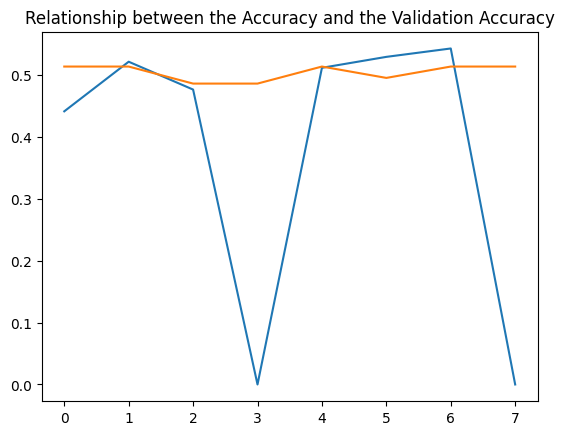

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"])
plt.title("Relationship between the Accuracy and the Validation Accuracy")

plt.show()

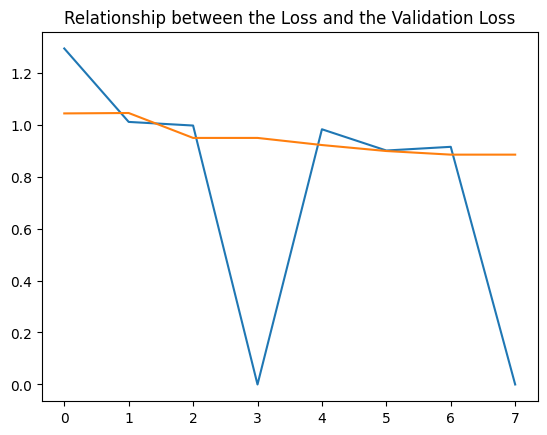

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h["loss"])
plt.plot(h["val_loss"])
plt.title("Relationship between the Loss and the Validation Loss")

plt.show()

In [ ]:
#model accuracy

from tensorflow.keras.models import load_model

model = load_model("/content/bestpath.keras")

acc = model.evaluate(test_data)[1]

print(f"The accuracy of our model is {acc}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 579ms/step - accuracy: 0.4742 - loss: 1.0822
The accuracy of our model is 0.5114155411720276


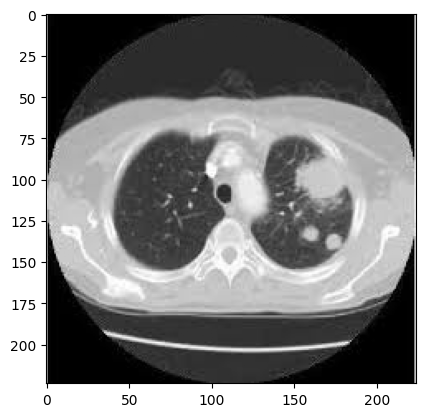

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2
The CT Scan has a malignant tumor 


In [ ]:
from keras.preprocessing.image import load_img, img_to_array

path = "/content/download.jpeg"

img = load_img(path, target_size = (224, 224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)
prediction = model.predict(input_arr)
pred = np.argmax(prediction, axis = -1)[0]

#pred = model.predict_classes(input_arr)[0][0]

print(pred)

if pred == 0:
    print("The CT Scan has a benign tumor")
elif pred == 2:
    print("The CT Scan has a malignant tumor ")
else:
    print("The CT Scan does not have a tumor")

In [ ]:
train_data.class_indices

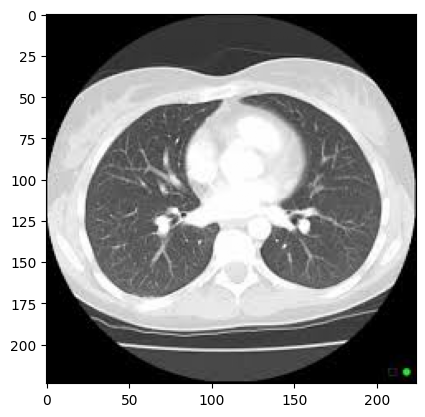

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2
The CT Scan has a malignant tumor 


In [ ]:
from keras.preprocessing.image import load_img, img_to_array

path = "/content/download.jpeg"

img = load_img(path, target_size = (224, 224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)
prediction = model.predict(input_arr)
pred = np.argmax(prediction, axis = -1)[0]

#pred = model.predict_classes(input_arr)[0][0]

print(pred)

if pred == 0:
    print("The CT Scan has a benign tumor")
elif pred == 2:
    print("The CT Scan has a malignant tumor ")
else:
    print("The CT Scan does not have a tumor")

In [ ]:
train_data.class_indices